In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# warning library
import warnings
warnings.filterwarnings('ignore')

## Create Data Sets

In [2]:
random_state = 42

n_samples = 2000
n_features = 20
n_classes = 2
n_estimators = 10
noise_class = 0.2
noise_moon = 0.2
noise_circle = 0.2


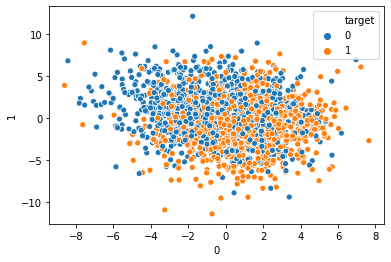

In [3]:
x,y = make_classification(n_samples = n_samples,
                          n_features = n_features,
                          n_classes = n_classes,
                          n_repeated = 0,
                          n_redundant = 0,
                          n_informative = n_features - 1,
                          random_state = random_state,
                          n_clusters_per_class = 1,
                          flip_y = noise_class)
data = pd.DataFrame(x)
data["target"] = y
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data);

This dataset for multiclass. And it will be called " Dataset # 2 "

In [4]:
data_classification = (x,y)

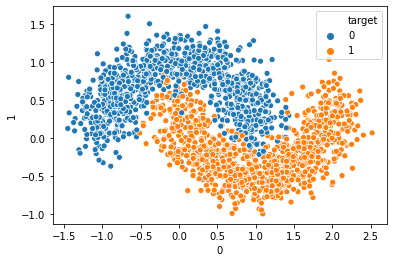

In [5]:
# Moon dataset
moon = make_moons(n_samples = n_samples,
                  noise = noise_moon,
                  random_state = random_state)

data_moon = pd.DataFrame(moon[0])
data_moon["target"] = moon[1]
plt.figure
sns.scatterplot(x = data_moon.iloc[:,0], y = data_moon.iloc[:,1], hue = "target", data = data_moon);

This dataset for binary classification.And it will be called " Dataset # 0 "

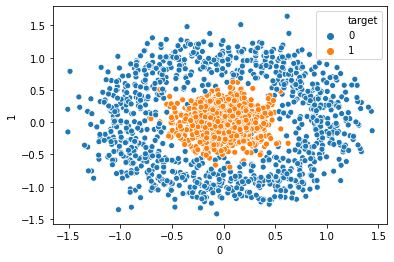

In [6]:
#Circle dataset
circle = make_circles(n_samples = n_samples,
                  noise = noise_circle,
                  factor = 0.1,
                  random_state = random_state)
data_circle = pd.DataFrame(circle[0])
data_circle["target"] = circle[1]
plt.figure
sns.scatterplot(x = data_circle.iloc[:,0], y = data_circle.iloc[:,1], hue = "target", data = data_circle);

This dataset for binary classification.And it will be called " Dataset # 1 "

In order to be able to visualize in the future, we will have to combine data sets;

In [7]:
datasets = [moon, circle]

We are combining these two data sets as we will make binary classification.

In [8]:
# KNN, SVM, Decision Tree // Random Forest, AdaptiveBoosting

In [9]:
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=15)
dt = DecisionTreeClassifier(random_state = random_state)

rf = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = n_estimators, random_state = random_state)
v1 = VotingClassifier(estimators = [("svc",svc),("KNN",knn),("Decision Tree",dt),("Random Forest",rf),("AdaBoost",ada)])


classifiers = [svc, knn, dt, rf, ada, v1]
names = ["SVC", "KNN", "Decision Tree","Random Forest","AdaBoost","Voting Classifier"]

In [10]:
%matplotlib qt
h = 0.2
i = 1
figure = plt.figure(figsize=(18, 6))
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,marker = '^', edgecolors='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    print("Dataset # {}".format(ds_cnt))

    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        print("{}: test set score: {} ".format(name, score))
        
        score_train = clf.score(X_train, y_train)  
        
        print("{}: train set score: {} ".format(name, score_train))
        print()
        
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,marker = '^',
                   edgecolors='white', alpha=0.6)

        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                size=15, horizontalalignment='right')
        i += 1
    print("-------------------------------------")

plt.tight_layout()
plt.show()

def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        print()

print("Dataset # 2")   
make_classify(data_classification, classifiers,names)  

Dataset # 0
SVC: test set score: 0.97 
SVC: train set score: 0.9691666666666666 

KNN: test set score: 0.97125 
KNN: train set score: 0.9716666666666667 

Decision Tree: test set score: 0.96125 
Decision Tree: train set score: 1.0 

Random Forest: test set score: 0.9675 
Random Forest: train set score: 0.9975 

AdaBoost: test set score: 0.96125 
AdaBoost: train set score: 1.0 

Voting Classifier: test set score: 0.97125 
Voting Classifier: train set score: 0.9975 

-------------------------------------
Dataset # 1
SVC: test set score: 0.975 
SVC: train set score: 0.9866666666666667 

KNN: test set score: 0.97625 
KNN: train set score: 0.9875 

Decision Tree: test set score: 0.9725 
Decision Tree: train set score: 1.0 

Random Forest: test set score: 0.97625 
Random Forest: train set score: 0.9975 

AdaBoost: test set score: 0.9725 
AdaBoost: train set score: 1.0 

Voting Classifier: test set score: 0.97875 
Voting Classifier: train set score: 0.9975 

----------------------------------